In [10]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
IMAGE_SIZE = 256
CHANNELS = 3

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    "dataset/train",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)

Found 1506 images belonging to 3 classes.


In [13]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [14]:
class_names = list(train_generator.class_indices.keys())

In [15]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
count = 0

for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.6199665  0.61212337 0.66310376]
  [0.67294526 0.6651021  0.7160825 ]
  [0.68907756 0.6812344  0.7322148 ]
  ...
  [0.547125   0.5353603  0.5784975 ]
  [0.5487779  0.5370132  0.5801504 ]
  [0.55043083 0.5386661  0.5818034 ]]

 [[0.6202026  0.61235946 0.66333985]
  [0.6694033  0.6615602  0.71254057]
  [0.68836915 0.680526   0.7315064 ]
  ...
  [0.5375234  0.5257587  0.56889594]
  [0.53634274 0.52457803 0.5677153 ]
  [0.5351621  0.5233974  0.56653464]]

 [[0.6204388  0.6125957  0.66357607]
  [0.66586137 0.65801823 0.7089986 ]
  [0.68766075 0.6798176  0.730798  ]
  ...
  [0.54563916 0.53387445 0.5770117 ]
  [0.54658365 0.53481895 0.57795626]
  [0.5475282  0.5357635  0.57890075]]

 ...

 [[0.7667632  0.7589201  0.7785279 ]
  [0.76558256 0.7577394  0.77734727]
  [0.7644019  0.7565588  0.7761666 ]
  ...
  [0.6568293  0.63722146 0.66075087]
  [0.62356204 0.6039542  0.6274836 ]
  [0.5928555  0.5732477  0.5967771 ]]

 [[0.7515798  0.7437367  0.7633445 ]
  [0.7532328  0.74538964 0.7649975 ]


In [ ]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)

Found 214 images belonging to 3 classes.


In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [20]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.7038251  0.695982   0.75088394]
  [0.7050652  0.69722205 0.752124  ]
  [0.7063052  0.69846207 0.753364  ]
  ...
  [0.7087732  0.7087732  0.755832  ]
  [0.71275264 0.71275264 0.75981146]
  [0.7389262  0.7389262  0.785985  ]]

 [[0.6490389  0.6411958  0.69609773]
  [0.66019934 0.6523562  0.7072582 ]
  [0.6713599  0.66351676 0.7184187 ]
  ...
  [0.7081531  0.7081531  0.75521195]
  [0.7170928  0.7170928  0.76415163]
  [0.7426464  0.7426464  0.7897052 ]]

 [[0.6776251  0.6697819  0.72468394]
  [0.66770464 0.6598615  0.71476346]
  [0.6577842  0.6499411  0.70484304]
  ...
  [0.7075331  0.7075331  0.75459194]
  [0.72143304 0.72143304 0.76849186]
  [0.74636656 0.74636656 0.7934254 ]]

 ...

 [[0.63035256 0.6225094  0.6752392 ]
  [0.5684918  0.5606487  0.61555064]
  [0.54468757 0.5351937  0.5950479 ]
  ...
  [0.5847505  0.57690734 0.6318093 ]
  [0.55250907 0.54466593 0.5995679 ]
  [0.5202677  0.5124246  0.56732655]]

 [[0.61609197 0.60824883 0.6615986 ]
  [0.56415164 0.5563085  0.61121047]


In [21]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

c:\Deep Learning\Potato_Disease_Classification\myenv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False), metrics=["accuracy"])

In [25]:
1506/32

47.0625

In [26]:
215/32

6.71875

In [27]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20 
)

c:\Deep Learning\Potato_Disease_Classification\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.4925 - loss: 0.9277 - val_accuracy: 0.5052 - val_loss: 0.8485
Epoch 2/20
 1/47 ━━━━━━━━━━━━━━━━━━━━ 22s 479ms/step - accuracy: 0.6875 - loss: 0.7190

c:\Deep Learning\Potato_Disease_Classification\myenv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.6875 - loss: 0.7190 - val_accuracy: 0.4896 - val_loss: 0.8575
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 629ms/step - accuracy: 0.6230 - loss: 0.7412 - val_accuracy: 0.7292 - val_loss: 0.7817
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.7188 - loss: 0.7725 - val_accuracy: 0.7865 - val_loss: 0.7339
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 628ms/step - accuracy: 0.7668 - loss: 0.5616 - val_accuracy: 0.7812 - val_loss: 0.4564
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8750 - loss: 0.3444 - val_accuracy: 0.8021 - val_loss: 0.4837
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 623ms/step - accuracy: 0.8877 - loss: 0.2873 - val_accuracy: 0.8958 - val_loss: 0.3110
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.8750 - loss: 0.2175 - val_accuracy: 0.9062 - val_loss: 0.2622
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 638ms/step - accuracy: 0.9123 - loss: 0.2382 - val_accuracy: 0.9062 - val_

In [28]:
scores = model.evaluate(test_generator)
scores

c:\Deep Learning\Potato_Disease_Classification\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 594ms/step - accuracy: 0.8922 - loss: 0.2713


[0.2695293426513672, 0.8932714462280273]

In [29]:
history

In [30]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [31]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [32]:
type(history.history["loss"])

list

In [33]:
len(history.history["loss"])

20

In [34]:
history.history["loss"][:5]

[0.8991448283195496,
 0.7189909219741821,
 0.7087823748588562,
 0.7724887728691101,
 0.4696537256240845]

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [36]:
val_acc

[0.5052083134651184,
 0.4895833432674408,
 0.7291666865348816,
 0.7864583134651184,
 0.78125,
 0.8020833134651184,
 0.8958333134651184,
 0.90625,
 0.90625,
 0.9166666865348816,
 0.890625,
 0.9010416865348816,
 0.8697916865348816,
 0.8854166865348816,
 0.8645833134651184,
 0.8802083134651184,
 0.921875,
 0.9427083134651184,
 0.8541666865348816,
 0.8697916865348816]

In [37]:
acc

[0.5081411004066467,
 0.6875,
 0.6784260272979736,
 0.71875,
 0.8066485524177551,
 0.875,
 0.885345995426178,
 0.875,
 0.9138398766517639,
 0.90625,
 0.9389416575431824,
 0.90625,
 0.8398914337158203,
 0.9375,
 0.9246947169303894,
 0.875,
 0.9138398766517639,
 1.0,
 0.8934870958328247,
 0.96875]

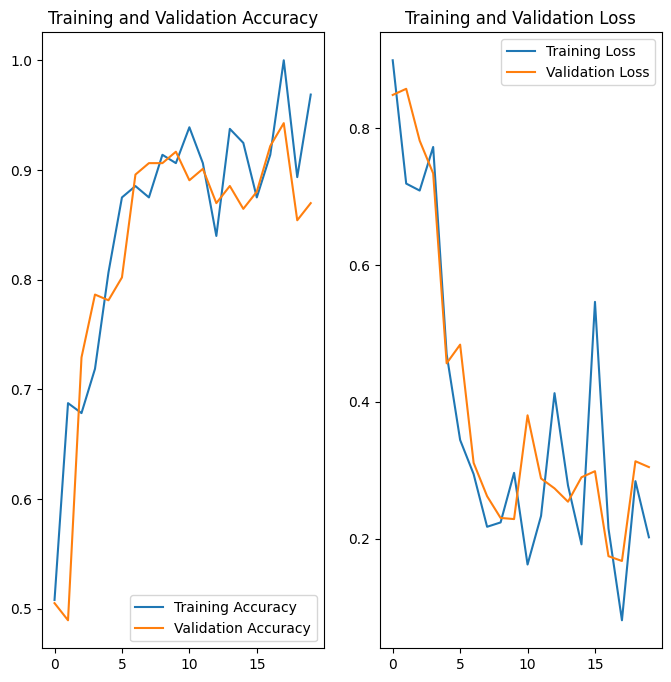

In [38]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
predicted label: Potato___Early_blight


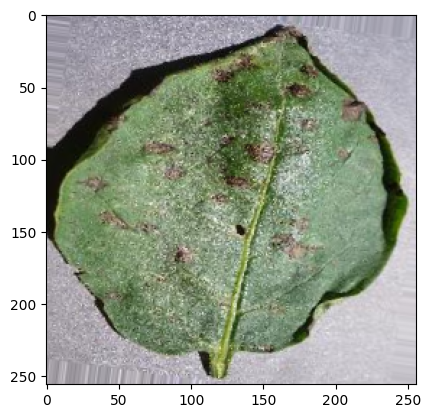

In [41]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

    break

In [42]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


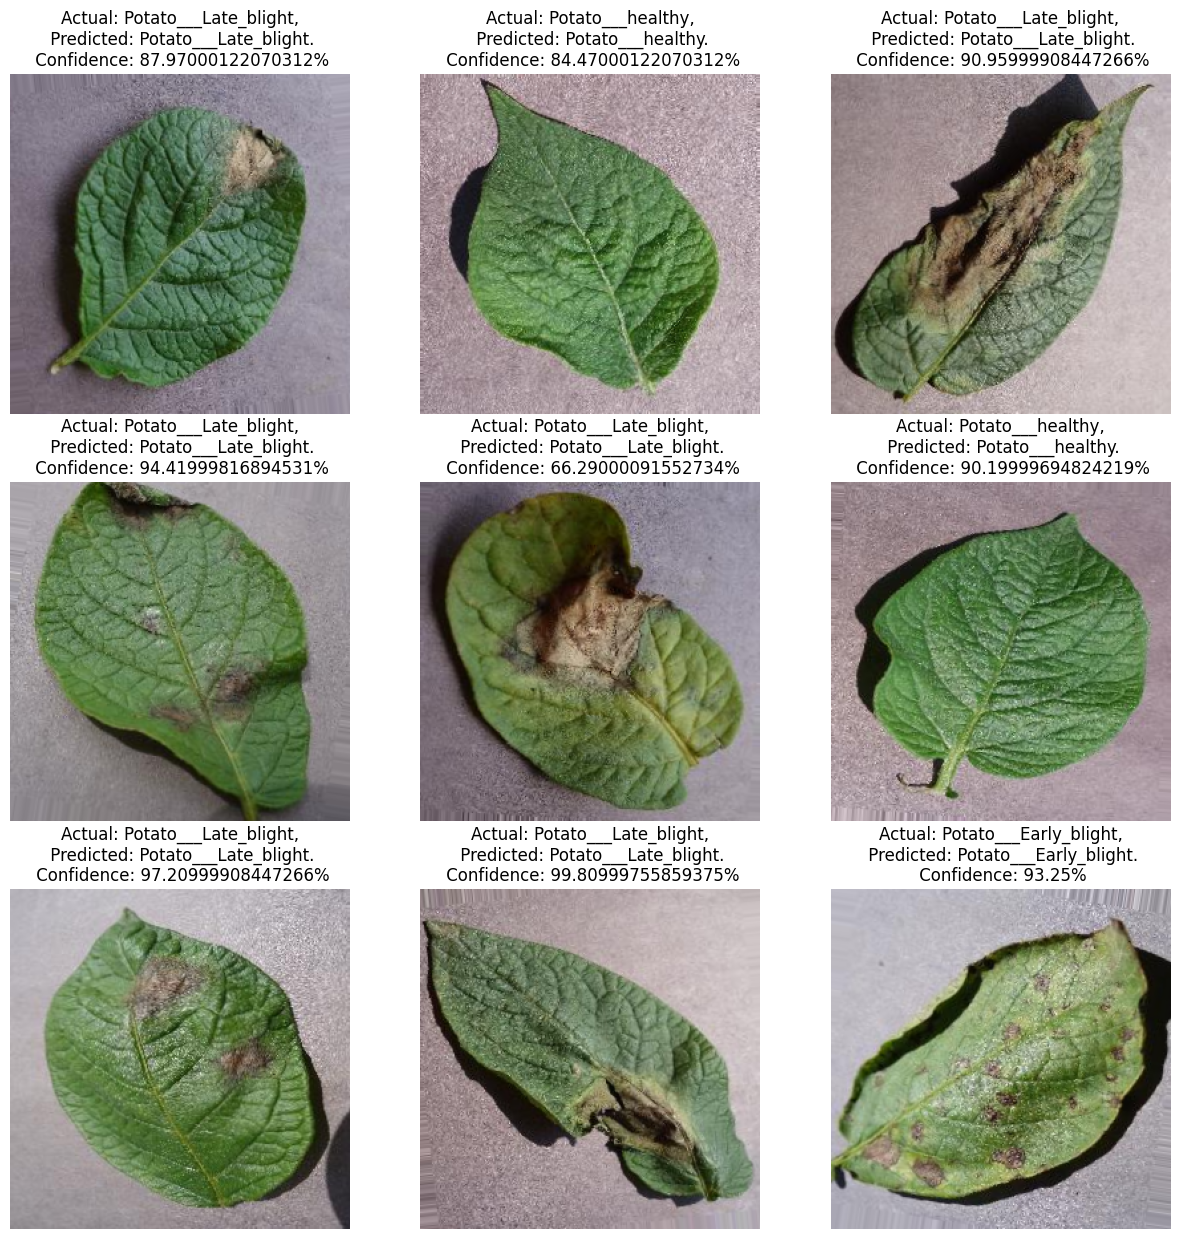

In [43]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [46]:
model.save("./models/potatoes.h5")